Variables Nominales y Categóricas
===

## Definición del problema

Se desea determinar a cuál clase ($A$, $B$ o $C$) pertenece un elemento, a partir de resultados previamente recolectados.

Se tiene un conjunto de 15 ejemplos para los cuales se tienen tres características $x_1$, $x_2$ y $x_3$ y su respectiva clase. Se desea determinar a que clase pertenece un nuevo punto con coordenadas $x_1$, $x_2$ y $x_3$.

     #   x1   x2   x3    y  
    ------------------------
     1    a    g    h    A
     2    a    e    i    A
     3    a    f    h    A
     4    d    f    j    A
     5    d    g    j    A
     6    b    e    i    B 
     7    b    f    i    B
     8    b    f    i    B
     9    c    g    h    B
    10    c    g    h    B
    11    a    e    i    C
    12    b    g    j    C
    13    c    f    j    C
    14    c    g    h    C
    15    c    e    i    C

## Metodología 

### Transformación de variables categóricas

Para el caso propuesto, las variables de entrada son categoricas, tal que no pueden ser usadas directamente en una red neuronal o un modelo de regresión logística. Una trasformación para volverlas numéricas es la técnica one-hot-encoder. 

Esta transformación genera una columna por cada categoría de la variable en consideración; cada posición tiene el valor de cero para indicar que la categoría no esta presente, y el valor de uno para indicar la  presencia de dicha categoría. 


### Implementación

Se cargan los datos del problema de forma usual.

In [1]:
X = [['a', 'g', 'h'],
     ['a', 'e', 'i'],
     ['a', 'f', 'h'],
     ['d', 'f', 'j'],
     ['d', 'g', 'j'],
     ['b', 'e', 'i'],
     ['b', 'f', 'i'],
     ['b', 'f', 'i'],
     ['c', 'g', 'h'],
     ['c', 'g', 'h'],
     ['a', 'e', 'i'],
     ['b', 'g', 'j'],
     ['c', 'f', 'j'],
     ['c', 'g', 'h'],
     ['c', 'e', 'i']]

d = ['A', 'A', 'A', 'A', 'A', 
     'B', 'B', 'B', 'B', 'B',
     'C', 'C', 'C', 'C', 'C']

Se aplica el preprocesador a la matriz X. Ya que $x_1$ tiene cuatro valores posibles $\{a, b, c, d\}$, se generan cuatro columnas; para la primera columna, el valor de cada elemento indica si en el ejemplo $x_1=a$ o $x_1 \ne a$, la segunda columna si  $x_1=b$ o $x_1 \ne b$, y así sucesicamente. Luego se codifica $x_2$, y finalmente $x_3$.

In [27]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

encX = OneHotEncoder()
encX.fit(X) 
encX.transform(X).toarray().tolist()


[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]

El mismo procedimiento puede usarse para la variable de salida que codifica la clase.

In [28]:
##
##  Codificación de la clase
##
encY = OneHotEncoder()
encY.fit(np.array(d).reshape(-1, 1)) 
d_enc = encY.transform(np.array(d).reshape(-1, 1)).toarray()

print(d_enc[:,0]) ## Clase A
print(d_enc[:,1]) ## Clase B
print(d_enc[:,2]) ## Clase C

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


## Solución

En este caso se usará un ADALINE para realizar la clasificación.

In [29]:
class AdalineClassifier:
    """
    ADALINE classifier
    
    Parameters
    ----------
    learning_rate : float
        Learning rate coefficient. Default to 0.1. 
        
    max_iter : integer
        The maximun number of passes over the training data (aka epochs).
        Default to 100    
    """
    
    def __init__(self, learning_rate=0.00001, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None
        
    def fit(self, X, y):
        self.w = np.zeros(1 + len(X[0]))
        X = [[1] + u for u in X]
        X = np.array(X)
        d = np.array(y)
        history = []
        for iter in range(self.max_iter):
            p = np.dot(X, self.w)
            e = d - p
            self.w += 2 * self.learning_rate * np.sum((X.T * e).T, axis=0) 
            history.append(sum([a**2 for a in e]))
        return history

    def predict(self, X):
        X = [[1] + u for u in X]
        X = np.array(X)
        y = np.dot(X, self.w)
        return [-1 if v <= 0 else +1 for v in y]

In [37]:
mA = AdalineClassifier(learning_rate=0.001, max_iter=10000)
mB = AdalineClassifier(learning_rate=0.001, max_iter=10000)
mC = AdalineClassifier(learning_rate=0.001, max_iter=10000)

In [38]:
A = d_enc[:,0].tolist()
B = d_enc[:,1].tolist()
C = d_enc[:,2].tolist()

historyA = mA.fit(encX.transform(X).toarray().tolist(), A)
historyB = mB.fit(encX.transform(X).toarray().tolist(), B)
historyC = mC.fit(encX.transform(X).toarray().tolist(), C)

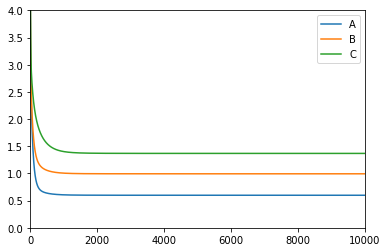

In [39]:
plt.plot(historyA)
plt.plot(historyB)
plt.plot(historyC);
plt.legend(['A', 'B', 'C']);
plt.xlim(0, 10000)
plt.ylim(0, 4);

In [40]:
mA.predict(encX.transform(X).toarray().tolist())

[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1]

In [41]:
mB.predict(encX.transform(X).toarray().tolist())

[1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1]

In [42]:
mC.predict(encX.transform(X).toarray().tolist())

[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1]

### Otras transformaciones

Otras transformaciones pueden ser aplicadas a los datos; por ejemplo (ver https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing):


* Binarización.


* Escalamiento.


* Estandarización.